<a href="https://colab.research.google.com/github/kalangisathvika/LinearRegTutorial/blob/main/200101048_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **DA623: Computing with signals.**
### **Name: Kalangi Sathvika.**
### **Roll No: 200101048.**

A **tutorial** on the topic: Linear regression on synthetic 2-D data, concept of overfitting and underfitting, impact of outliers on MSE.

## Import Necessary Libraries

We start by importing the required libraries for our tutorial.
*   numpy is used for numerical computations.
*   matplotlib.pyplot is used for data visualization.
*   LinearRegression from sklearn.linear_model is used to perform linear regression.
*   mean_squared_error from sklearn.metrics is used to calculate the Mean Squared Error.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## Generation of Synthetic 2-D Data

We generate synthetic 2-D data for demonstration purposes. We use NumPy to create random data points X and y following a linear relationship with some added noise.

In [2]:
# Generation of synthetic 2D data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


## Visualization of the Data

We visualize the synthetic data using a scatter plot.
This helps us understand the distribution and relationship between the independent variable X and the dependent variable y.

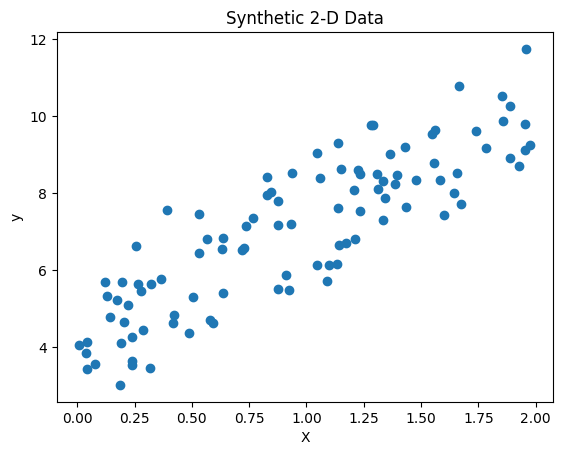

In [3]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic 2-D Data')
plt.show()


## Fit Linear Regression Model



*   We initialize a LinearRegression model from scikit-learn.
*   We fit the model to our synthetic data (X and y).
*   This calculates the coefficients (slope and intercept) of the best-fit line that minimizes the least squares error.





In [4]:
# Fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression()

## Visualize the Linear Regression Line

We plot the original data points along with the regression line.
The regression line represents the predicted values of y based on the linear relationship with X.
This visualization helps us evaluate how well the linear regression model fits the data.

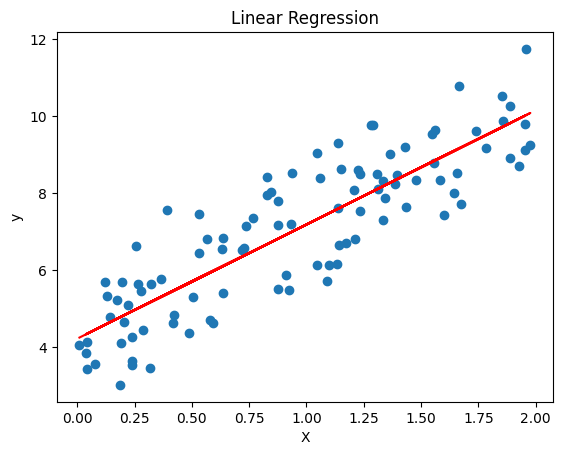

In [5]:
plt.scatter(X, y)
plt.plot(X, lin_reg.predict(X), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()


## Calculate Mean Squared Error (MSE)

MSE stands for Mean Squared Error, and it's a common metric used to evaluate the performance of regression models.

In the context of linear regression, MSE measures the average squared difference between the actual values (or targets) and the predicted values made by the regression model. Here's how it's calculated:

1. **Calculate Residuals:** For each data point, subtract the predicted value (obtained from the regression model) from the actual target value. These differences are called residuals.

2. **Square the Residuals:** Square each of the residuals to ensure they are all positive.

3. **Calculate Mean:** Take the average of all the squared residuals.


**Interpretation of MSE:**
- A lower MSE indicates that the model is better at predicting the target variable on average, as it means the squared differences between the actual and predicted values are smaller.
- Conversely, a higher MSE suggests that the model's predictions are farther away from the actual values on average.

In [6]:
# Calculate MSE
y_pred = lin_reg.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.9924386487246479


## Introduce Outliers



*   **Outliers** are data points that deviate significantly from the rest of the data.
*   this helps us to demonstrate the impact of outliers on linear regression.
*   We introduce outliers to the original data by adding additional data points (X_outliers and y_outliers).

In [7]:
# Introduce outliers
X_outliers = np.array([[0.2], [1.0]])
y_outliers = np.array([[20], [18]])
X_with_outliers = np.vstack((X, X_outliers))
y_with_outliers = np.vstack((y, y_outliers))


## Fit Linear Regression Model with Outliers

We refit the linear regression model to the data with outliers.
The model now takes into account the outliers in addition to the original data points.

In [8]:
# Fit linear regression model with outliers
lin_reg_outliers = LinearRegression()
lin_reg_outliers.fit(X_with_outliers, y_with_outliers)


LinearRegression()

## Visualize the Linear Regression Line with Outliers

We plot the data with outliers along with the regression line obtained after refitting the model.
This visualization helps us observe how the presence of outliers affects the regression line.

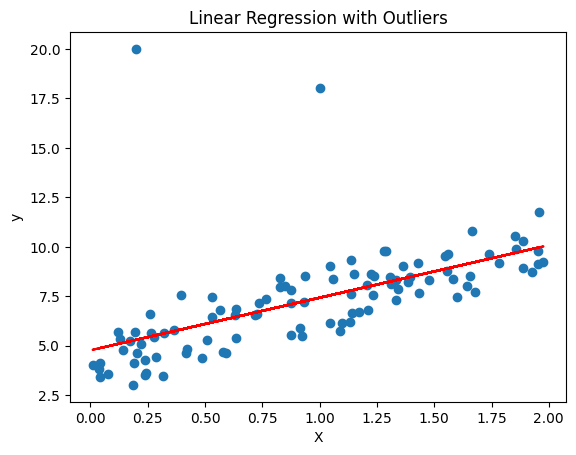

In [9]:
plt.scatter(X_with_outliers, y_with_outliers)
plt.plot(X_with_outliers, lin_reg_outliers.predict(X_with_outliers), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Outliers')
plt.show()


## Calculate MSE with Outliers

We calculate the Mean Squared Error (MSE) using the data with outliers.
Comparing this MSE with the previous one (without outliers) helps us assess the impact of outliers on the accuracy of the model.

In [10]:
# Calculate MSE with outliers
y_pred_outliers = lin_reg_outliers.predict(X_with_outliers)
mse_outliers = mean_squared_error(y_with_outliers, y_pred_outliers)
print("Mean Squared Error with Outliers:", mse_outliers)


Mean Squared Error with Outliers: 4.281606934827169


## Conclusion about MSE with and without outliers.

Without Outliers:
*   In the absence of outliers, the linear regression model generally fits the data well.
*   The MSE is relatively low because the model can accurately predict most data points.

With Outliers:
*   Introducing outliers significantly impacts the performance of the linear regression model.
*   Outliers can pull the regression line towards them, causing it to deviate from the true underlying relationship.
*   The presence of outliers increases the MSE, as the model struggles to accurately predict the outlier values.


---



# concept of overfitting and underfitting

### Overfitting:

- **Definition:** Overfitting occurs when a model captures noise in the data rather than the underlying relationship. It happens when the model is too complex relative to the amount of data available.
- **Explanation:** In the context of linear regression, overfitting can occur if we use a model with a high degree polynomial or too many features for the amount of data we have. This can lead to the model fitting the training data extremely well but performing poorly on unseen data.
- **Example:** Suppose we fit a high-degree polynomial regression model to our synthetic data. This model might perfectly fit every data point, including outliers, resulting in very low training error (MSE). However, it may fail to generalize well to new data, leading to high prediction error when tested on unseen data.

### Underfitting:

- **Definition:** Underfitting occurs when a model is too simple to capture the underlying structure of the data. It happens when the model is insufficiently complex relative to the complexity of the true relationship.
- **Explanation:** In the context of linear regression, underfitting can occur if we use a model with too few features or constraints, such as a linear model for data with a nonlinear relationship. This can result in poor performance on both the training and test data.
- **Example:** If we fit a linear regression model to data that exhibits a quadratic relationship, the model may not capture the curvature of the data well. This results in high training error (MSE) because the model cannot adequately represent the data.

## Import Necessary Libraries

PolynomialFeatures and make_pipeline from sklearn.preprocessing and sklearn.pipeline respectively are used to create polynomial features and build a pipeline for polynomial regression.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


## Generate Synthetic Quadratic Data

We generate synthetic data that follows a quadratic relationship.
The data consists of input variable X and output variable y, where y is generated from a quadratic equation with some added noise.

In [19]:
# Generate synthetic quadratic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + 0.5 * X**2 + np.random.randn(100, 1)


## Visualize the Data

We visualize the synthetic data using a scatter plot.
This step helps us understand the distribution and relationship between the independent variable X and the dependent variable y.

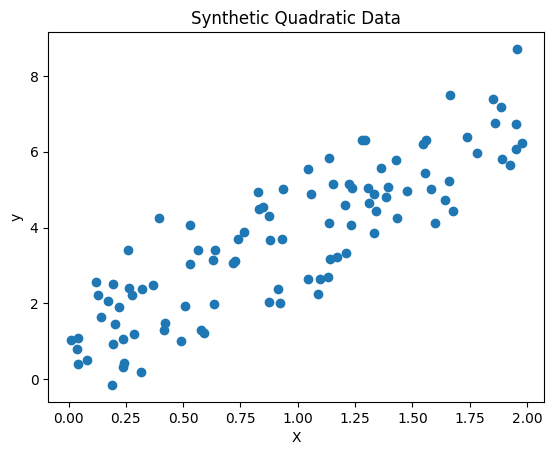

In [20]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Quadratic Data')
plt.show()


## Fit Linear Regression Model (Underfitting)

We initialize a LinearRegression model from scikit-learn.
We fit the model to our synthetic data (X and y).
Since linear regression is a simple model, it may fail to capture the quadratic relationship in the data, resulting in underfitting.

In [21]:
# Fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression()

##  Visualize the Linear Regression Line (Underfitting)

We plot the original data points along with the regression line obtained from the linear regression model.
The linear regression line may fail to capture the curvature of the data, indicating underfitting.

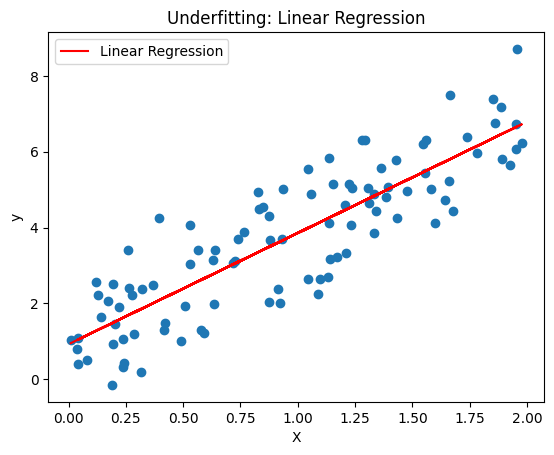

In [22]:
plt.scatter(X, y)
plt.plot(X, lin_reg.predict(X), color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Underfitting: Linear Regression')
plt.legend()
plt.show()


## Fit Polynomial Regression Model (Overfitting)



*   We use polynomial regression to fit a model to the data.
*   We create a pipeline that first generates polynomial features (up to degree 10) and then fits a linear regression model to these features.
*   Polynomial regression can capture more complex relationships compared to linear regression, but it's susceptible to overfitting when the degree of the polynomial is too high relative to the amount of data.


In [23]:
# Fit polynomial regression model (degree 10)
poly_reg = make_pipeline(PolynomialFeatures(degree=10), LinearRegression())
poly_reg.fit(X, y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('linearregression', LinearRegression())])

## Visualize the Polynomial Regression Curve (Overfitting)



*   We generate a range of input values (X_plot) to visualize the polynomial regression curve.
*   We plot the original data points along with the regression curve obtained from the polynomial regression model.
*   The polynomial regression curve may closely fit the training data points but exhibit excessive oscillations, indicating overfitting.

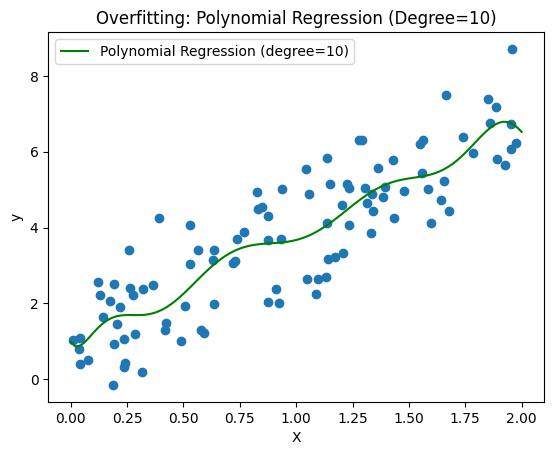

In [24]:
X_plot = np.linspace(0, 2, 100)[:, np.newaxis]
y_plot = poly_reg.predict(X_plot)

plt.scatter(X, y)
plt.plot(X_plot, y_plot, color='green', label='Polynomial Regression (degree=10)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Overfitting: Polynomial Regression (Degree=10)')
plt.legend()
plt.show()


## CONCLUSION

In this tutorial, we covered the basics of linear regression using synthetic 2-D data. We visualized the data, fitted a linear regression model, and calculated the Mean Squared Error (MSE). We then introduced outliers to the data, refitted the model, and observed the impact of outliers on the regression line and MSE.

we also demonstrated the concepts of overfitting and underfitting using synthetic quadratic data.
*   Underfitting: We fit a linear regression model to data with a quadratic relationship. The resulting regression line fails to capture the curvature of the data, indicating underfitting.
*   Overfitting: We fit a high-degree polynomial regression model (degree=10) to the same data. The resulting regression curve fits the training data very closely but exhibits wild oscillations, indicating overfitting.